### Import Libraries and Load in Data Set

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (make sure it's in datetime format)
df = pd.read_csv('Dataset_ecommerce.csv', parse_dates=['InvoiceDate'])

df.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [144]:
#Descriptive Statistics
df.describe() #shows discribes numerical variables only

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [145]:
#check for missing value
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [146]:
df.duplicated().sum()

0

In [147]:
# Drop rows where CustomerID is missing (because we need this for cohort analysis)
df = df.dropna(subset=['CustomerID'])
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [148]:
#Ensure the CustomerID is in string type
df['CustomerID'] = df['CustomerID'].astype(str)

### Data Visualisation

In [149]:
# Group by country and sum the quantity
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Display top countries
print(country_sales.head(10))  # Top 10 for a better view

# Get the country with the most products sold
top_country = country_sales.idxmax()
top_quantity = country_sales.max()

print(f"\n🌍 Country with the most products sold: {top_country} ({top_quantity} items)")

Country
Togo             741223
South Africa     740589
Cote d'Ivoire    740229
Nigeria          739708
Libya            739206
Benin            738133
Zimbabwe         737522
Somalia          736219
Algeria          736181
Sierra Leone     735477
Name: Quantity, dtype: int64

🌍 Country with the most products sold: Togo (741223 items)


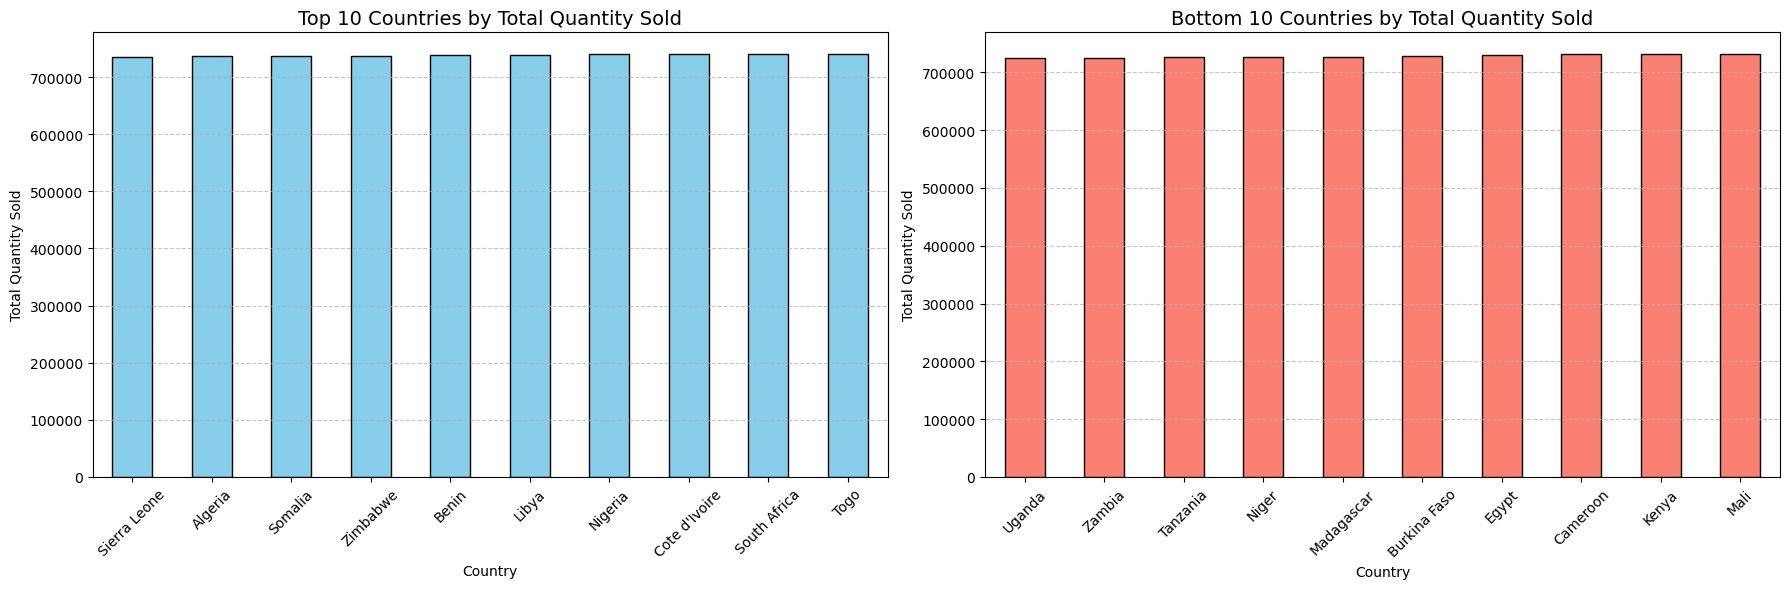

In [150]:
import matplotlib.pyplot as plt

# Group by country and sum quantities
country_sales = df.groupby('Country')['Quantity'].sum().sort_values()

# Create a figure and a 1x2 grid of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Top 10 countries on the first subplot
country_sales.tail(10).plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])

# Add labels and title to the first subplot
axes[0].set_title("Top 10 Countries by Total Quantity Sold", fontsize=14)
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Total Quantity Sold")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Bottom 10 countries on the second subplot
country_sales.head(10).plot(kind='bar', color='salmon', edgecolor='black', ax=axes[1])

# Add labels and title to the second subplot
axes[1].set_title("Bottom 10 Countries by Total Quantity Sold", fontsize=14)
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Total Quantity Sold")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [151]:
# Group by Country and count unique CustomerID
customer_counts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# Display top countries
print(customer_counts.head(10))  # Top 10 countries by unique customers

# Get the top country
top_country = customer_counts.idxmax()
top_customers = customer_counts.max()

print(f"\n🌍 Country with the most unique customers: {top_country} ({top_customers} customers)")

customer_counts.head(3)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Sierra Leone    3046
Mali            3044
Algeria         3043
Senegal         3040
Niger           3039
Name: CustomerID, dtype: int64

🌍 Country with the most unique customers: Mozambique (3072 customers)


Country
Mozambique    3072
Benin         3054
Togo          3053
Name: CustomerID, dtype: int64

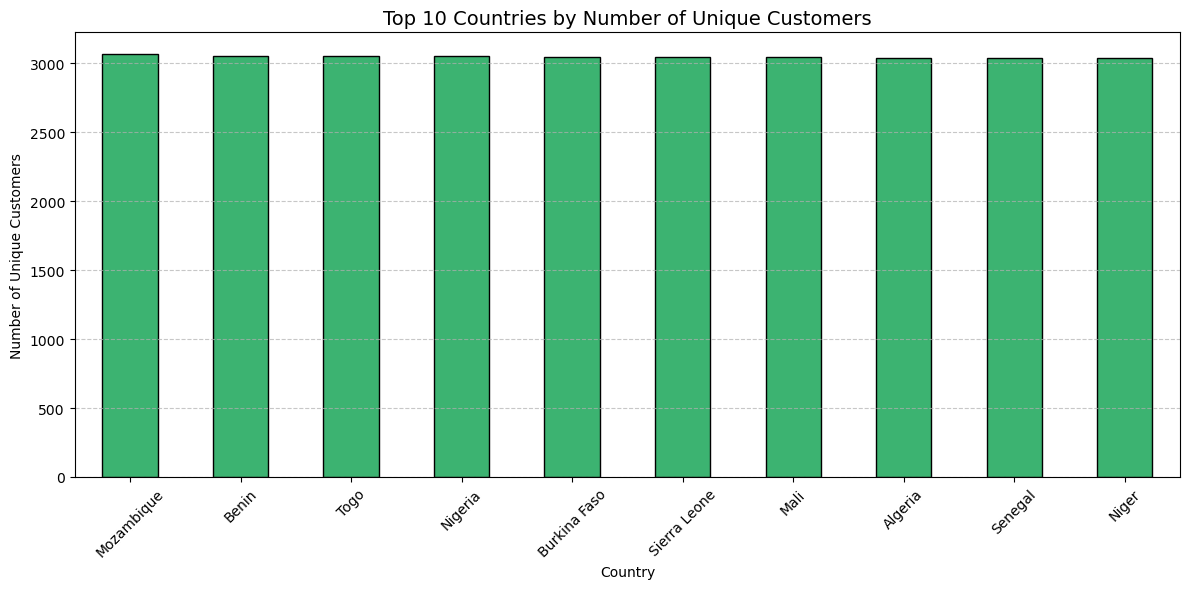

In [152]:
plt.figure(figsize=(12, 6))
customer_counts.head(10).plot(kind='bar', color='mediumseagreen', edgecolor='black')

# Add titles and labels
plt.title("Top 10 Countries by Number of Unique Customers", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4324/2747203633.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


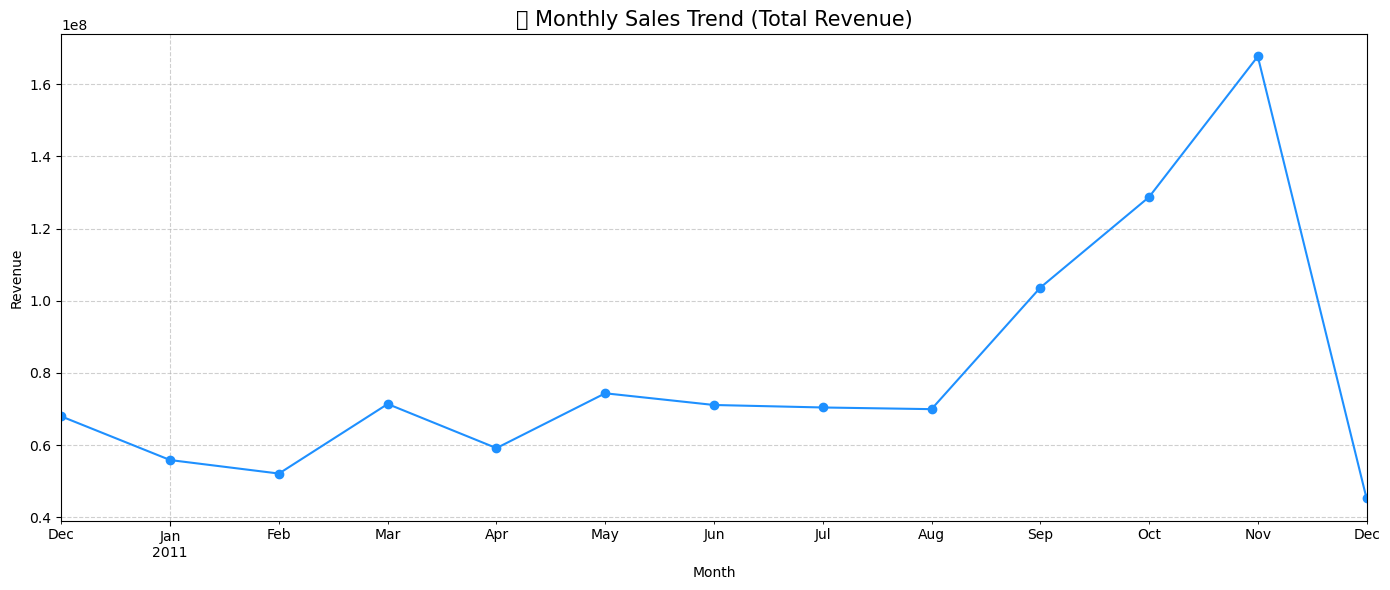

In [153]:
#Create a 'Revenue' column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

#Group by month and sum revenue
monthly_sales = df.set_index('InvoiceDate').resample('M')['Revenue'].sum()

#Plot the sales trend
plt.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', linestyle='-', color='dodgerblue')

# Add titles and labels
plt.title("📦 Monthly Sales Trend (Total Revenue)", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='InvoiceDate'>

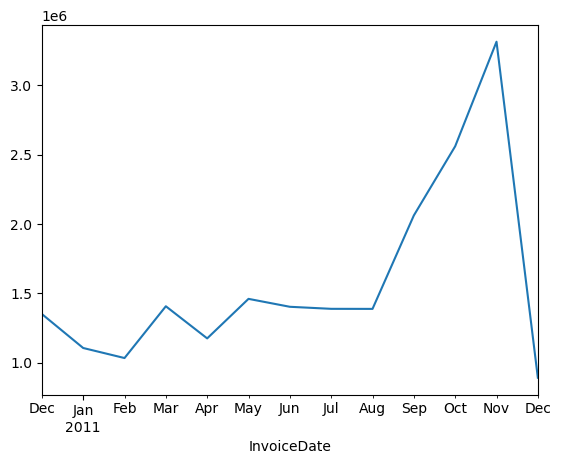

In [154]:
monthly_quantity = df.set_index('InvoiceDate').resample('M')['Quantity'].sum()
monthly_quantity.plot()

### Data Preperation

In [155]:
# Extract Year-Month for the invoice date and first purchase month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12-01,2010-12-01
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12-01,2010-12-01
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12-01,2010-12-01
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12-01,2010-12-01
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12-01,2010-12-01


In [156]:
# Calculate the number of months between the cohort month and the invoice month
df['CohortIndex'] = ((df['InvoiceMonth'].dt.year - df['CohortMonth'].dt.year) * 12 +
                     (df['InvoiceMonth'].dt.month - df['CohortMonth'].dt.month) + 1)

df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12-01,2010-12-01,1
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12-01,2010-12-01,1
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12-01,2010-12-01,1
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12-01,2010-12-01,1
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12-01,2010-12-01,1


### Create Cohorts

In [157]:
# Group by cohort and cohort index (to count unique users)
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to create a cohort table
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# Calculate cohort sizes (number of users in the first month of each cohort)
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention rates by dividing each cohort by its cohort size
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Format the retention matrix as percentages
retention_percent = retention.round(3) * 100

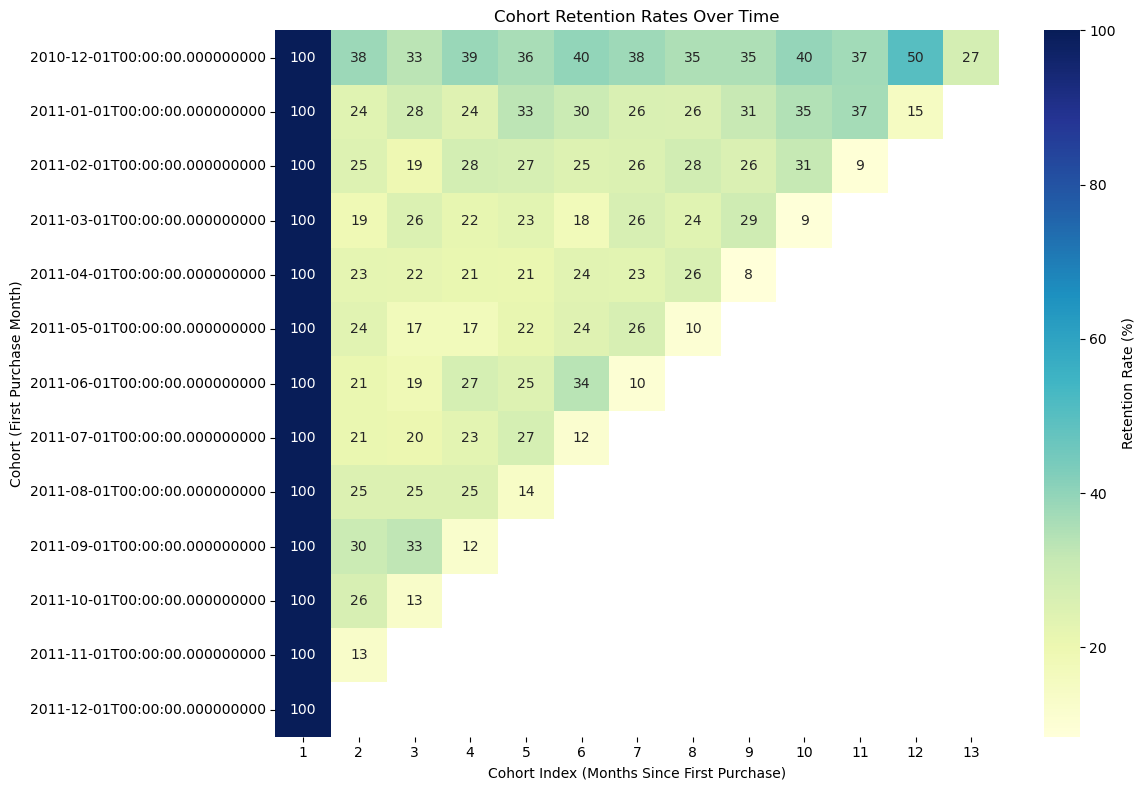

In [160]:
# Plot the cohort retention matrix
plt.figure(figsize=(12, 8))
sns.heatmap(retention_percent, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Retention Rate (%)'})

# Add labels and title
plt.title('Cohort Retention Rates Over Time')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort (First Purchase Month)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Observations from Cohort Retention:
* High Initial Drop-off: Most cohorts drop significantly in the 2nd month (e.g., Dec 2010 from 100% to 38%, Jan 2011 from 100% to 24%).
* Inconsistent Long-Term Retention: Only a few cohorts (e.g., Dec 2010, Jan 2011) show sustained retention past month 6.
* Strong Retention in Dec 2010: Notably high retention at months 10–12 (up to 50%)—suggests possible campaign or feature impact.
* Recent Cohorts (late 2011): Much lower long-term retention—may reflect issues with user experience or engagement strategy.

### Recommendations:
1. Focus on Onboarding & Month 2 Experience:
   * Reduce early churn by improving user onboarding and delivering value quickly.
2. Analyze High-Retention Cohorts:
   * Study Dec 2010 & Jan 2011 to identify what worked—e.g., marketing channels, features, offers.
3. Engagement Strategies Post-Month 1:
   * Implement re-engagement campaigns (emails, push notifications, rewards) during months 2–4.
4. Product Improvements:
   * Conduct user feedback sessions or A/B testing for lower-performing cohorts to find pain points.